In [1]:
from functions.load_training_data import training_samples, load_regression_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

In [2]:
start = time.time()
image_samples, image_labels, mask_composites, full_images = training_samples(1000, [1,1,1,1], load_masks=True)
print(time.time() - start)

566.051420211792


In [3]:
start = time.time()
cropped_imgs, cropped_masks, nuclei_sizes, labels = load_regression_samples(full_images, image_labels, mask_composites)
print(time.time() - start)

0.8316605091094971


In [30]:
nuclei_sizes[:9]

array([193.        , 185.5       ,   0.        ,   0.        ,
       306.        , 252.33333333,   0.        , 705.        ,
       362.        ])

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


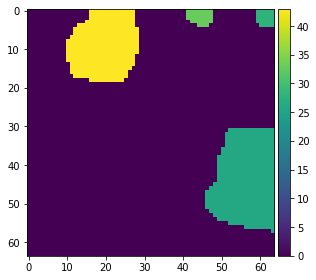

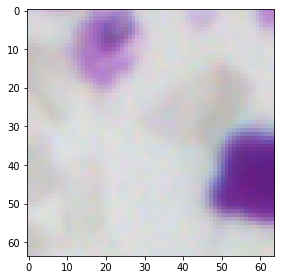

In [5]:
io.imshow(cropped_masks[1]); plt.figure()
io.imshow(cropped_imgs[1], cmap='nipy_spectral')

(array([1.566e+03, 2.040e+02, 2.360e+02, 2.610e+02, 2.020e+02, 2.060e+02,
        1.530e+02, 1.220e+02, 1.080e+02, 1.110e+02, 8.200e+01, 6.200e+01,
        4.600e+01, 4.800e+01, 4.900e+01, 4.900e+01, 4.000e+01, 2.800e+01,
        4.200e+01, 2.900e+01, 2.900e+01, 2.300e+01, 2.800e+01, 1.700e+01,
        2.100e+01, 1.400e+01, 1.800e+01, 1.000e+01, 1.000e+01, 1.600e+01,
        2.200e+01, 1.400e+01, 1.400e+01, 1.300e+01, 1.100e+01, 6.000e+00,
        7.000e+00, 1.000e+01, 1.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        0.000e+00, 6.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

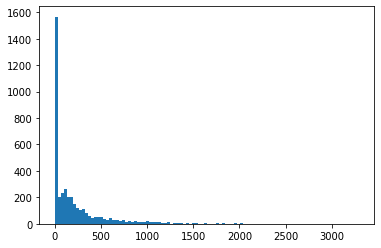

In [32]:
plt.hist(nuclei_sizes, bins=100)
# find the mean of all the values and divide by std. dev
# with mean and std. dev (x= (x-mean)/ std. dev) --> normalized nuclei sizes
# use np to find both ^

# Configure GPU

In [6]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Configure Model

In [7]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [8]:
predictions = model(cropped_imgs).numpy()
predictions

array([[-0.00941348],
       [-0.22759745],
       [-0.28090465],
       ...,
       [-0.22009951],
       [-0.164372  ],
       [-0.2268259 ]], dtype=float32)

In [11]:
loss_fn = keras.losses.MeanAbsoluteError(
                reduction="auto", name="mean_absolute_error")
loss_fn(nuclei_sizes, predictions).numpy()

216.22165

In [12]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss=loss_fn, metrics="mean_absolute_error")

In [28]:
model.fit(cropped_imgs, nuclei_sizes, epochs=5, verbose=1)

Epoch 1/5
125/125 [==============================] - 0s 2ms/step - loss: 105.0425 - mean_absolute_error: 105.0425
Epoch 2/5
125/125 [==============================] - 0s 2ms/step - loss: 105.0243 - mean_absolute_error: 105.0243
Epoch 3/5
125/125 [==============================] - 0s 2ms/step - loss: 105.0624 - mean_absolute_error: 105.0624
Epoch 4/5
125/125 [==============================] - 0s 2ms/step - loss: 104.7728 - mean_absolute_error: 104.7728
Epoch 5/5
125/125 [==============================] - 0s 2ms/step - loss: 104.3090 - mean_absolute_error: 104.3090
